In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

# データの読み込み

## 学習データ

In [39]:
data=pd.read_csv("../../kaggle/ASHRAE/train.csv/train.csv")
weather_info=pd.read_csv("../../kaggle/ASHRAE/weather_train.csv/weather_train.csv")
building_metadata=pd.read_csv("../../kaggle/ASHRAE/building_metadata.csv")
data_merge=data.merge(building_metadata,how="left",on="building_id")
data_merge=data_merge.merge(weather_info,how="left",on=["timestamp","site_id"])

MemoryError: Unable to allocate 1.00 MiB for an array with shape (131072,) and data type int64

In [ ]:
## 検証データ

In [ ]:
test_data=pd.read_csv("../../kaggle/ASHRAE/test.csv/test.csv")
weather_info_test=pd.read_csv("../../kaggle/ASHRAE/weather_test.csv/weather_test.csv")
test_data_merge=test_data.merge(building_metadata,how="left",on="building_id")
test_data_merge=test_data_merge.merge(weather_info_test,how="left",on=["timestamp","site_id"])

In [ ]:
data["timestamp"]=pd.to_datetime(data["timestamp"])
test_data["timestamp"]=pd.to_datetime(test_data["timestamp"])
data_merge["timestamp"]=pd.to_datetime(data_merge["timestamp"])
test_data_merge["timestamp"]=pd.to_datetime(test_data_merge["timestamp"])
weather_info["timestamp"]=pd.to_datetime(weather_info["timestamp"])
weather_info_test["timestamp"]=pd.to_datetime(weather_info_test["timestamp"])

### データの種類

|変数名|説明|データの種類|
|:-|:----------------------------------------|:-----:|
|**meter_reading**|**使用電力料**,予測したい値|連続データ|
|building_id|データファイルを結合するための番号|0～1448|
|meter|電力メータの種類を表す|0,1,2,3の4種類|
|timestamp|データを取得した時間を表す|1時間ピッチの時刻|
|site_id|データファイルを統合するために必要な番号|0～15の16か所|
|primary_use|建物の使用目的|文字列のデータ(Education,office)|
|square_feet|面積|数値の連続データ|
|year_built|建物を建てた年|西暦|
|floor_count|建物の部屋数|整数データ|
|air_temperature|気温(℃)|数値の連続データ|
|cloud_coverage|雲の量|0から9の10段階で分類|
|dew_temperature|露点温度(℃)|数値の連続データ|
|precip_depth_1_hr|降水量(mm)|数値の連続データ|
|sea_level_pressure|気圧(hPa)|数値の連続データ|
|wind_direction|風向(°)|0～360|
|wind_speed|風速(m/s)|数値の連続データ|






## 細かなデータの確認

### train.csv

In [6]:
data

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


### どのメータに関する情報が多いのか

In [7]:
data["meter"].value_counts()

0    12060910
1     4182440
2     2708713
3     1264037
Name: meter, dtype: int64

### 例えば0番目の建物、メータ0に注目
- ### id0はメータ0の情報しかない

Text(0, 0.5, 'meter_reanding')

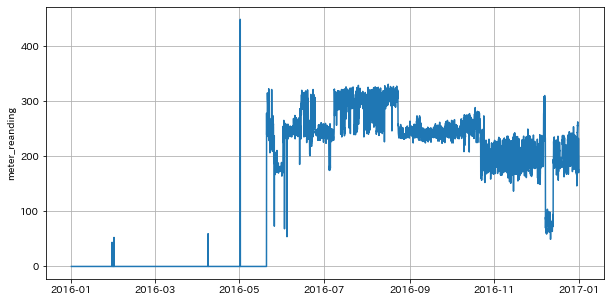

In [8]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(data[(data["building_id"]==0)&(data["meter"]==0)]["timestamp"],data[(data["building_id"]==0)&(data["meter"]==0)]["meter_reading"])
#ax.plot(data[(data["building_id"]==0)&(data["meter"]==1)]["timestamp"],data[(data["building_id"]==0)&(data["meter"]==1)]["meter_reading"])
ax.grid()
ax.set_ylabel("meter_reanding")

### weather_info.csv
- #### データが所々欠損している→色々見ていると前後の値で補完している
- #### 16か所の天気情報が入っている

In [9]:
weather_info

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


### 欠損値の数

In [10]:
weather_info.isna().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

### とりあえずsite_idが0と10の地点の気温情報をグラフ化

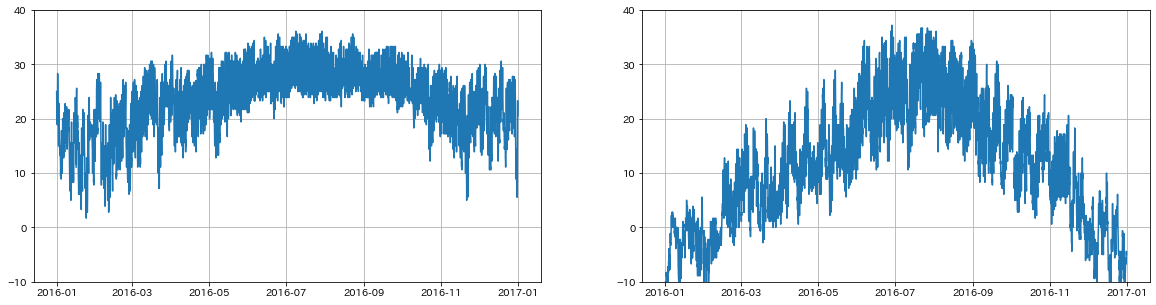

In [11]:
id1=0
id2=10
fig,ax=plt.subplots(1,2,figsize=(20,5))

ax[0].plot(weather_info[weather_info["site_id"]==id1]["timestamp"],weather_info[weather_info["site_id"]==id1]["air_temperature"])
ax[1].plot(weather_info[weather_info["site_id"]==id2]["timestamp"],weather_info[weather_info["site_id"]==id2]["air_temperature"])
for j in range(2):
    ax[j].set_ylim(-10,40)
    ax[j].grid()

### site_idがゼロの地点に注目して全天気情報を記述

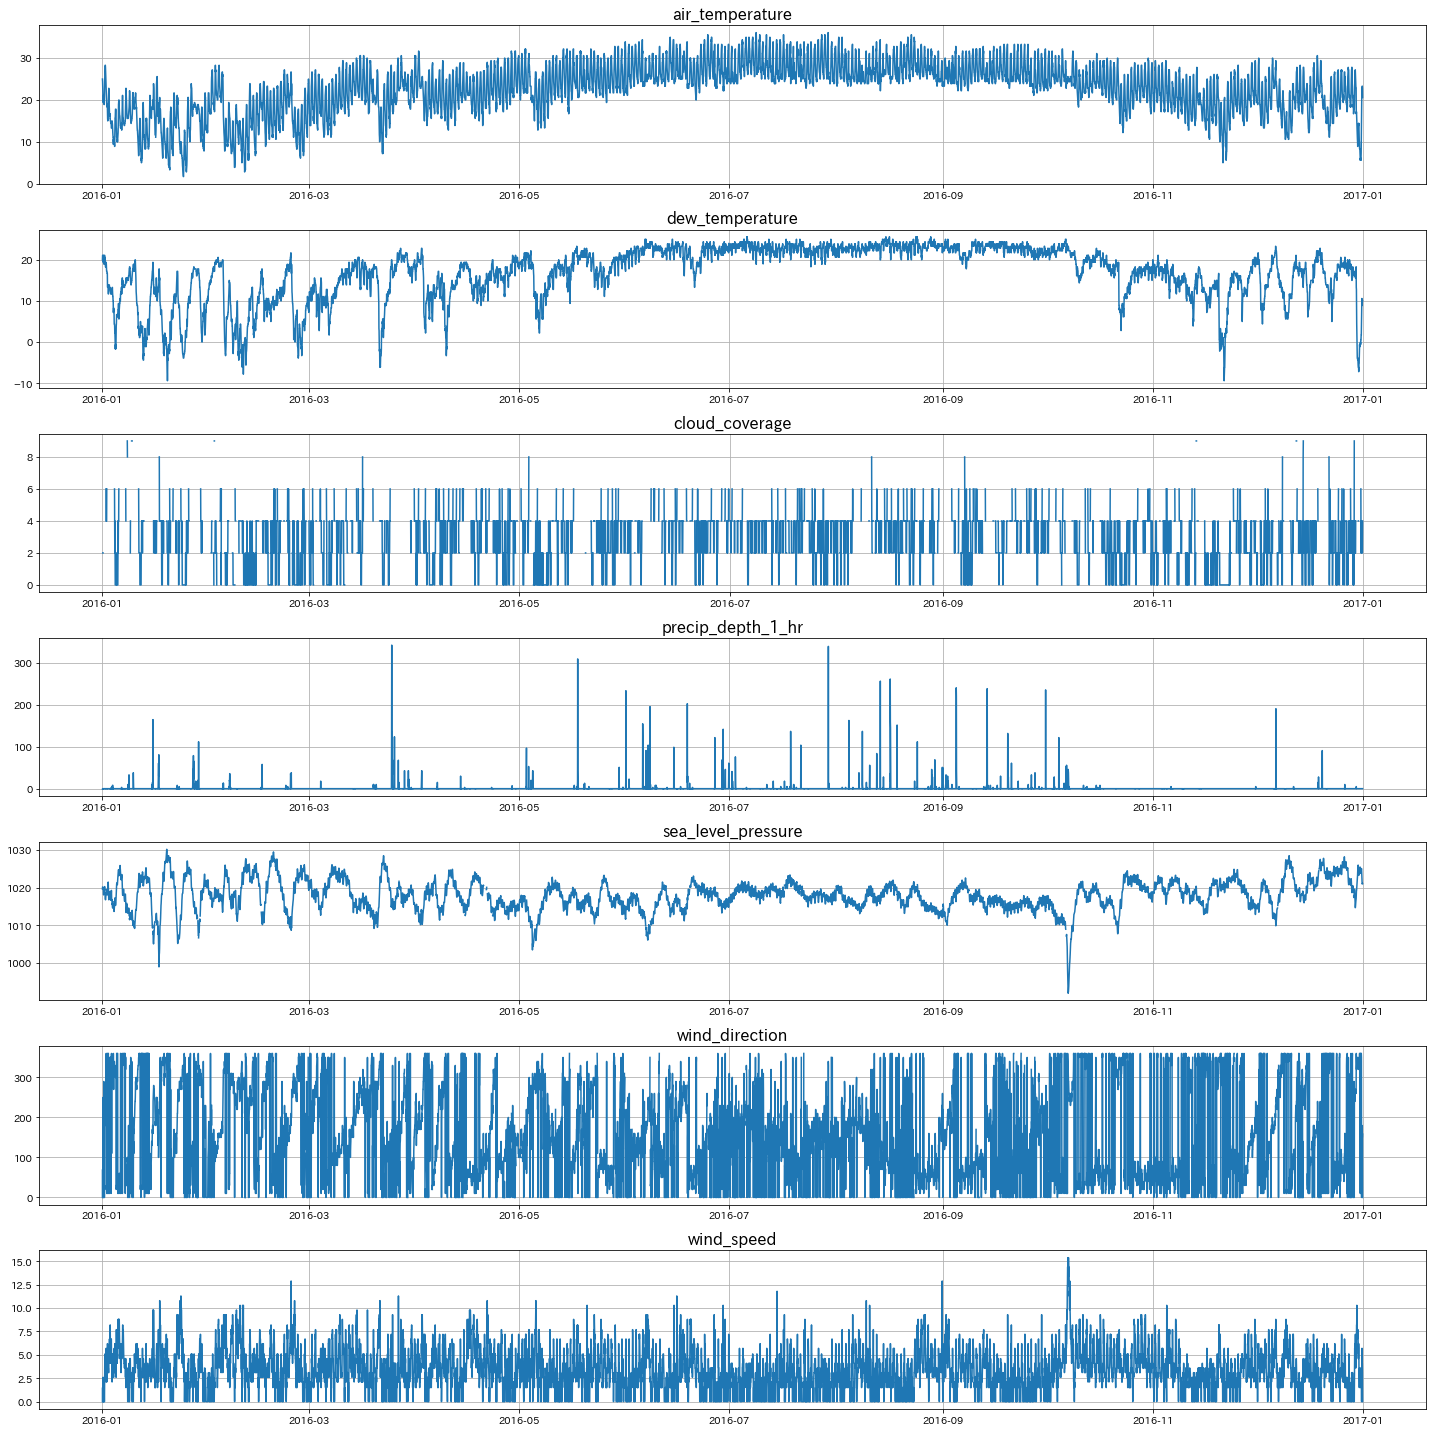

In [12]:
fig,ax=plt.subplots(7,1,figsize=(20,20))
id=0
ax[0].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["air_temperature"])
ax[1].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["dew_temperature"])
ax[2].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["cloud_coverage"])
ax[3].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["precip_depth_1_hr"])
ax[4].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["sea_level_pressure"])
ax[5].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["wind_direction"])
ax[6].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["wind_speed"])

ax[0].set_title("air_temperature",fontsize=16)
ax[1].set_title("dew_temperature",fontsize=16)
ax[2].set_title("cloud_coverage",fontsize=16)
ax[3].set_title("precip_depth_1_hr",fontsize=16)
ax[4].set_title("sea_level_pressure",fontsize=16)
ax[5].set_title("wind_direction",fontsize=16)
ax[6].set_title("wind_speed",fontsize=16)
for i in range(7):
    ax[i].grid()
plt.tight_layout()

## build_meta.csv(これは学習データ検証データで共通)

In [13]:
building_metadata

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


### 欠損値が結構あるよ
- #### year_builtとfloor_countは欠損が多すぎるので使わなくていいと考えております.

In [14]:
building_metadata.isna().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

### primary_useに注目
- #### 教育目的、オフィスが多い

No handles with labels found to put in legend.


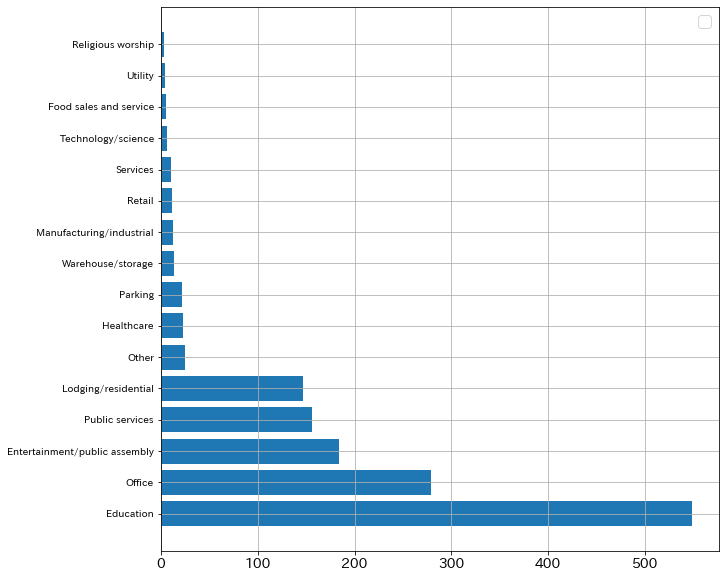

In [15]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.tick_params(axis="x",labelsize=14)
ax.barh(building_metadata["primary_use"].value_counts().keys(),building_metadata["primary_use"].value_counts())

ax.legend(fontsize=16)
ax.grid()

### データの紐づけを行ったうえでデータの確認
- #### とりあえず全部ログで表示
- #### 全体の傾向を見るためなのでビンは適当

c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


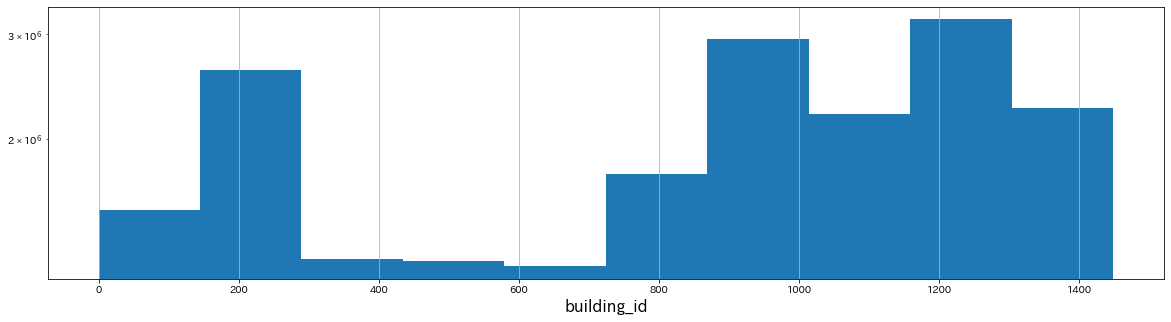

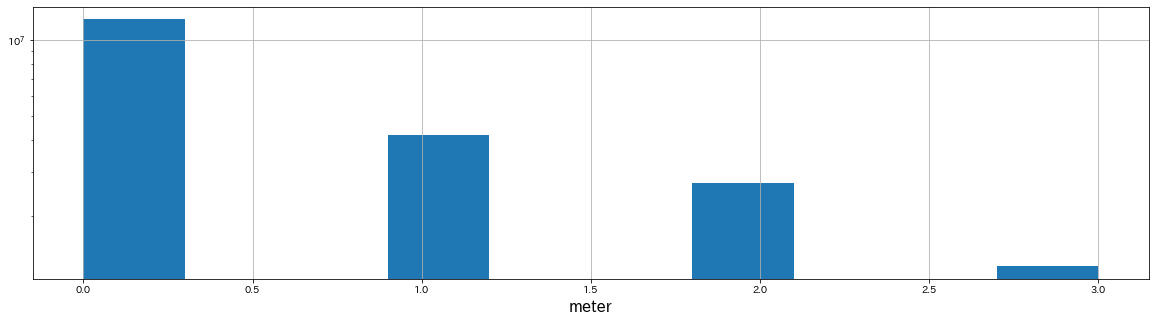

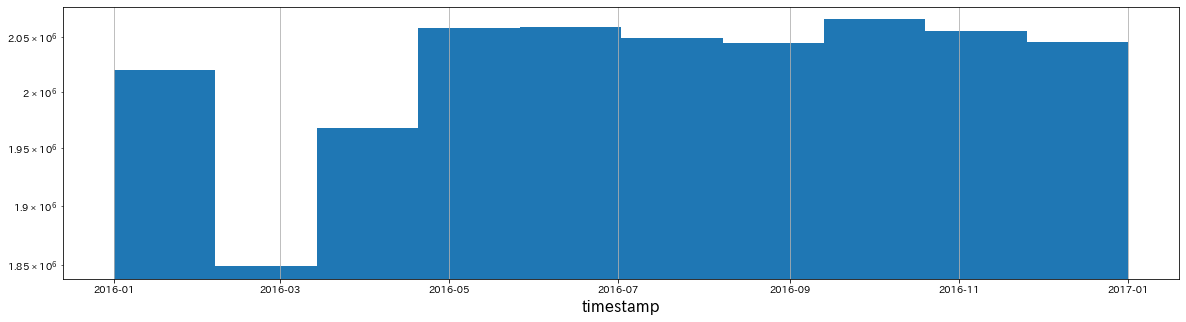

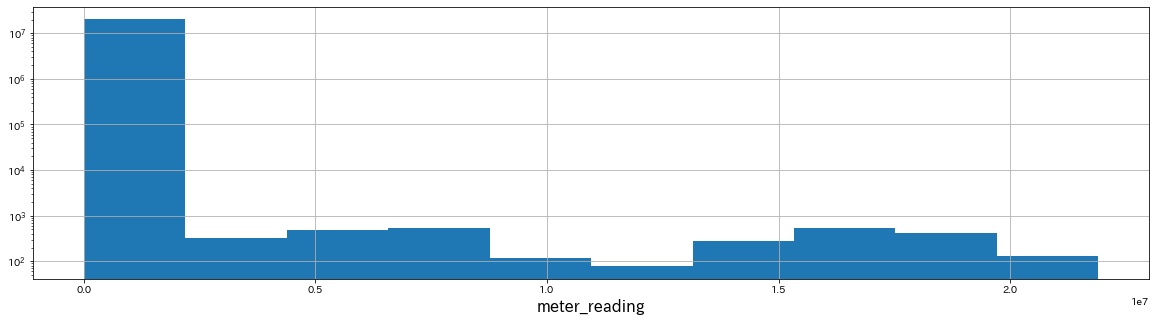

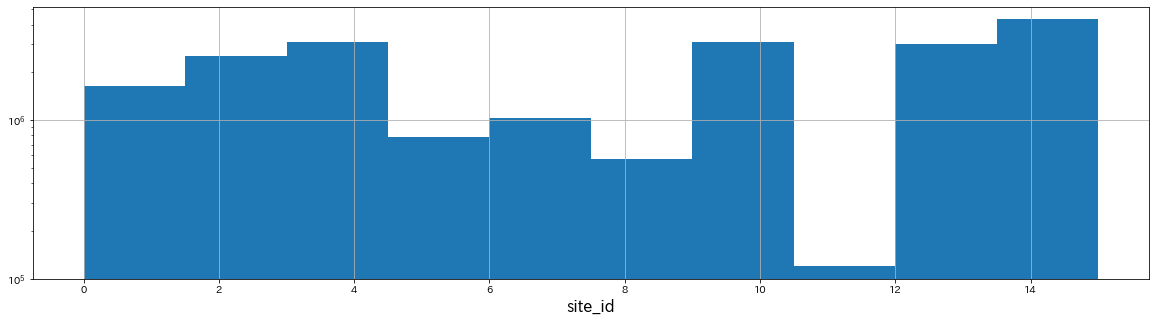

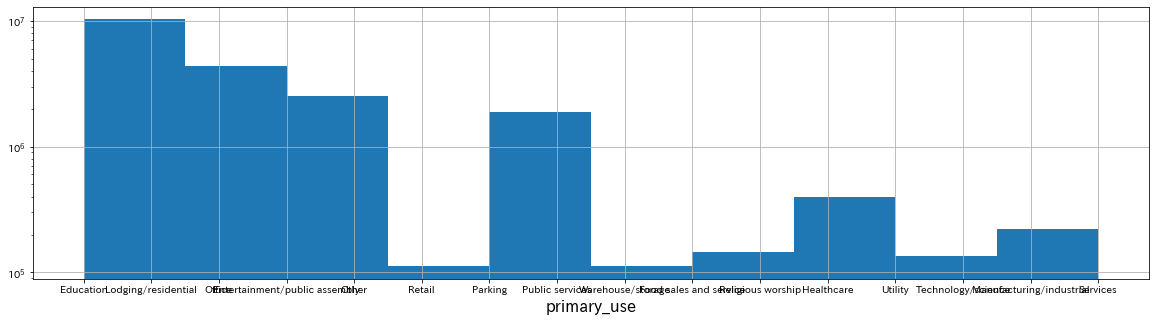

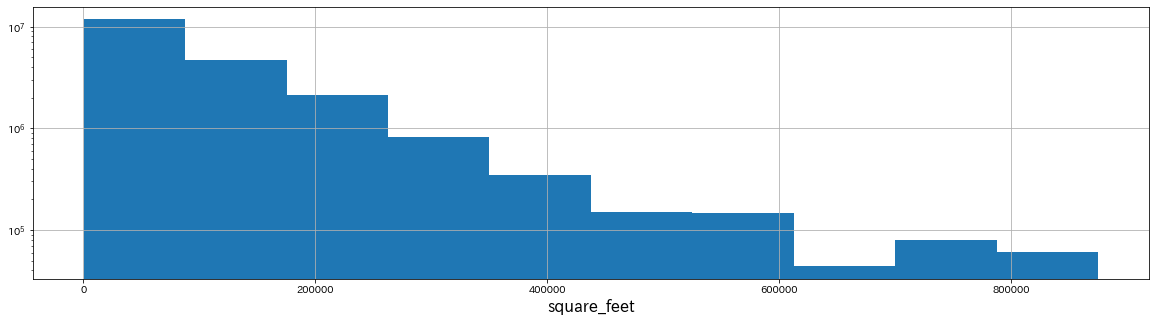

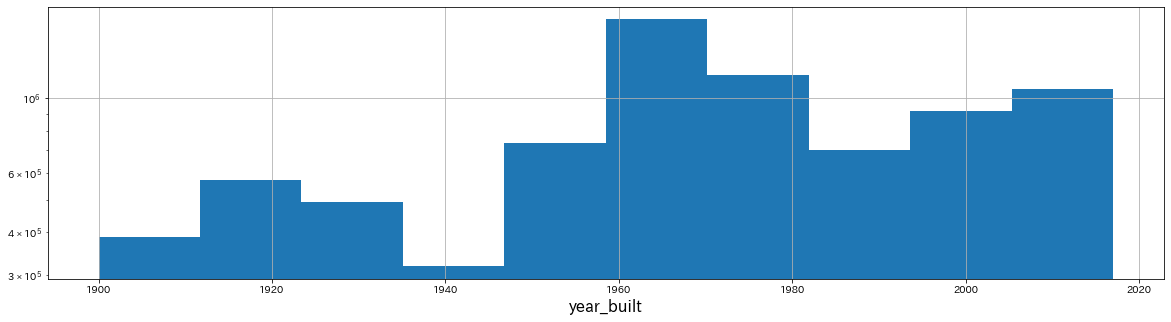

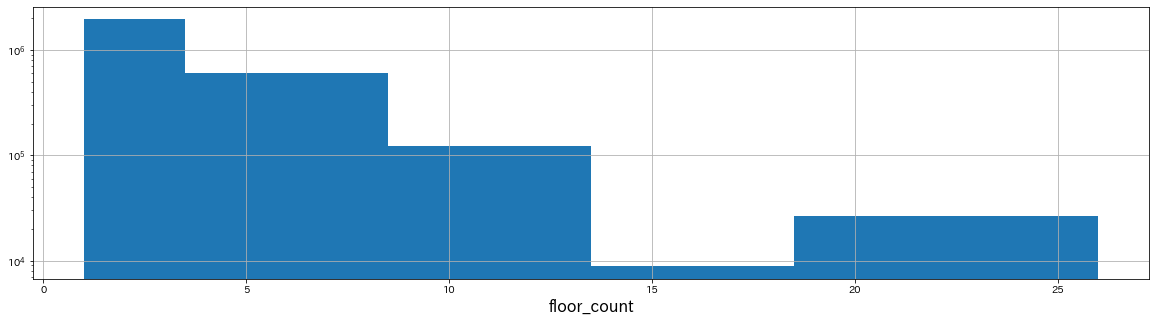

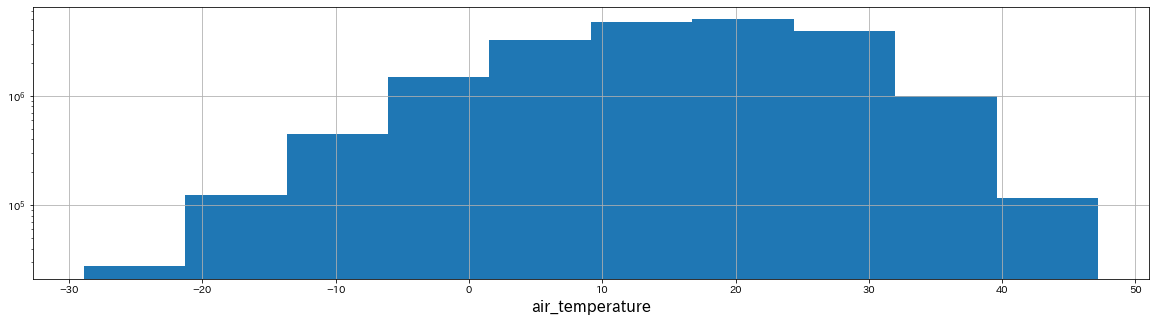

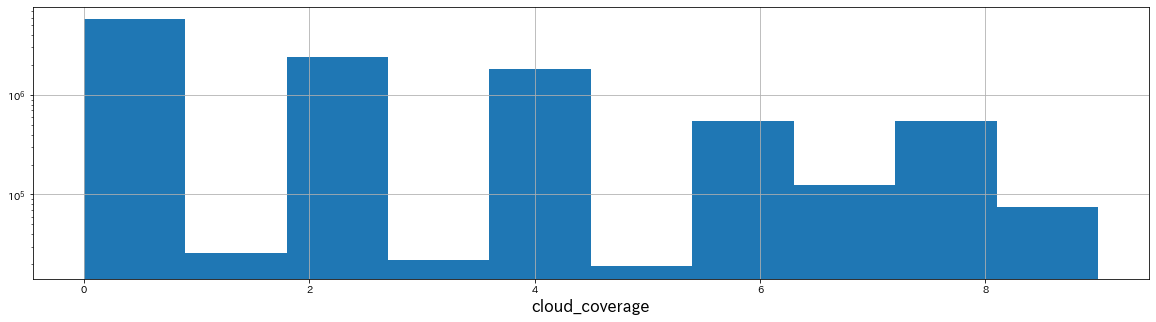

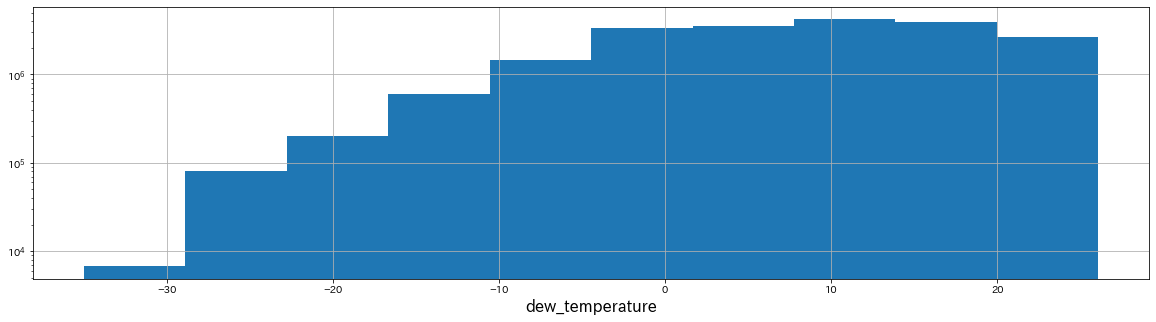

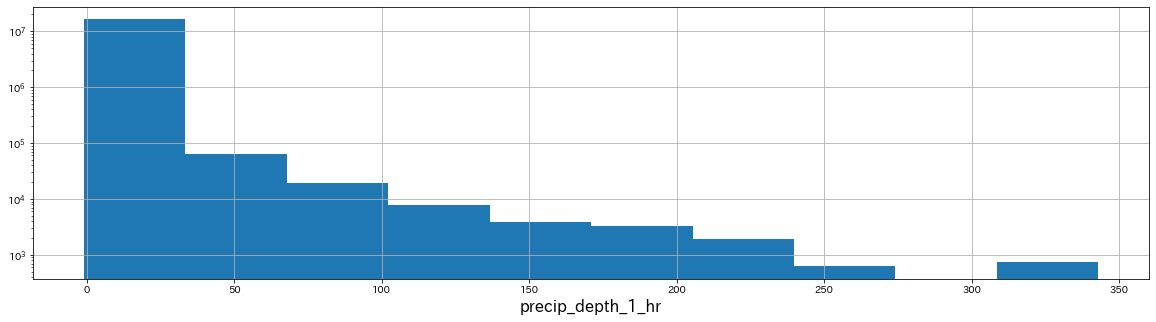

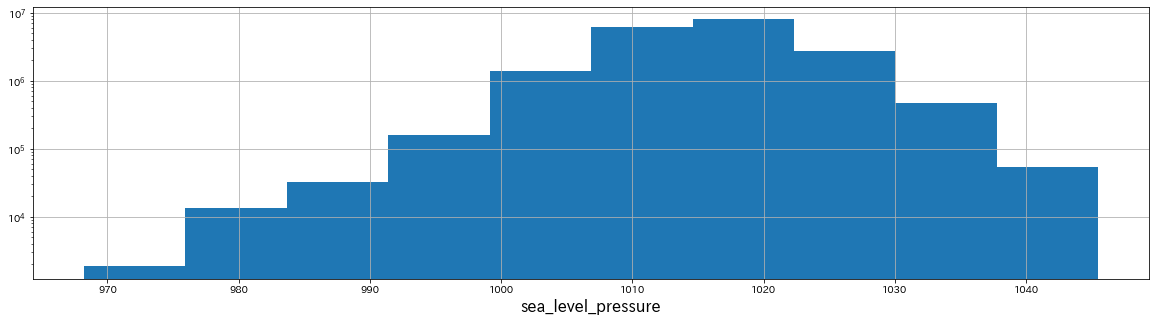

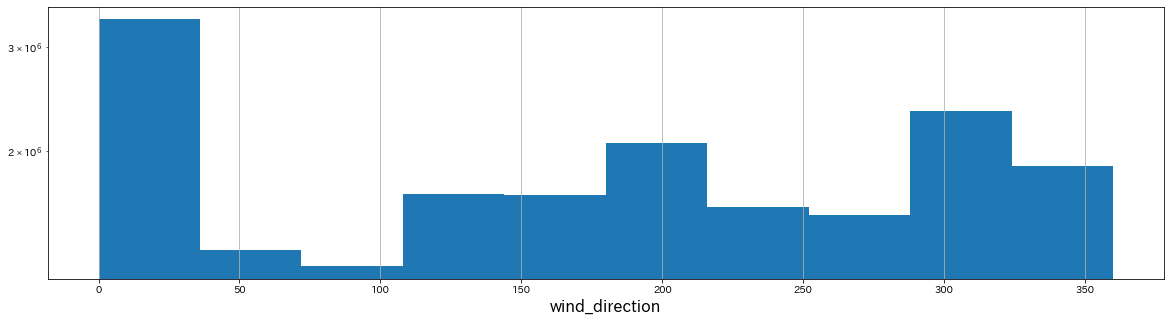

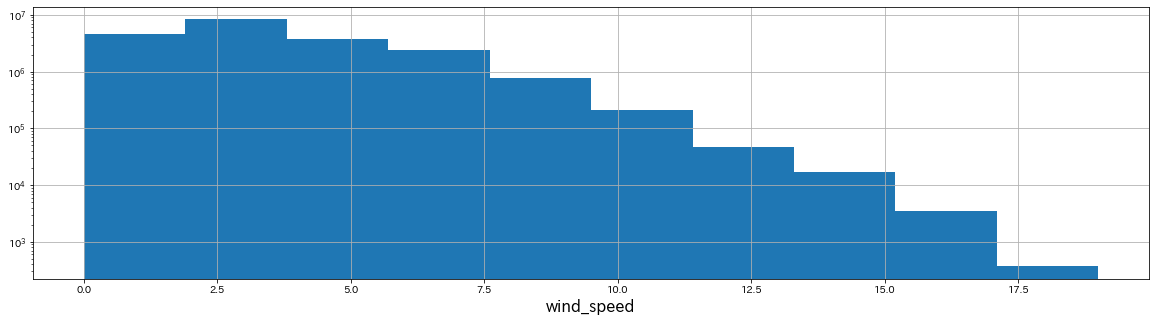

In [16]:
for i in data_merge.columns:
    fig,ax=plt.subplots(1,1,figsize=(20,5))
    ax.hist(data_merge[i])
    ax.set_xlabel(i,fontsize=16)
#ax.hist(data["meter_reading"])
    ax.set_yscale("log")
    ax.grid()

## 学習データと検証データの分布

In [17]:
### ヒストグラムを作る関数
def making_hist(x,y,label,n):
    ax[x][y].hist(data_merge[label],histtype="step",label="学習データ")
    ax[x][y].hist(test_data_merge[label],histtype="step",label="検証データ")
    ax[x][y].set_xlabel(label,fontsize=16)
    ax[x][y].legend(fontsize=16)
    ax[x][y].grid()
    if(n==1):
        ax[x][y].set_yscale("log")
    

### 天気系の情報

c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\

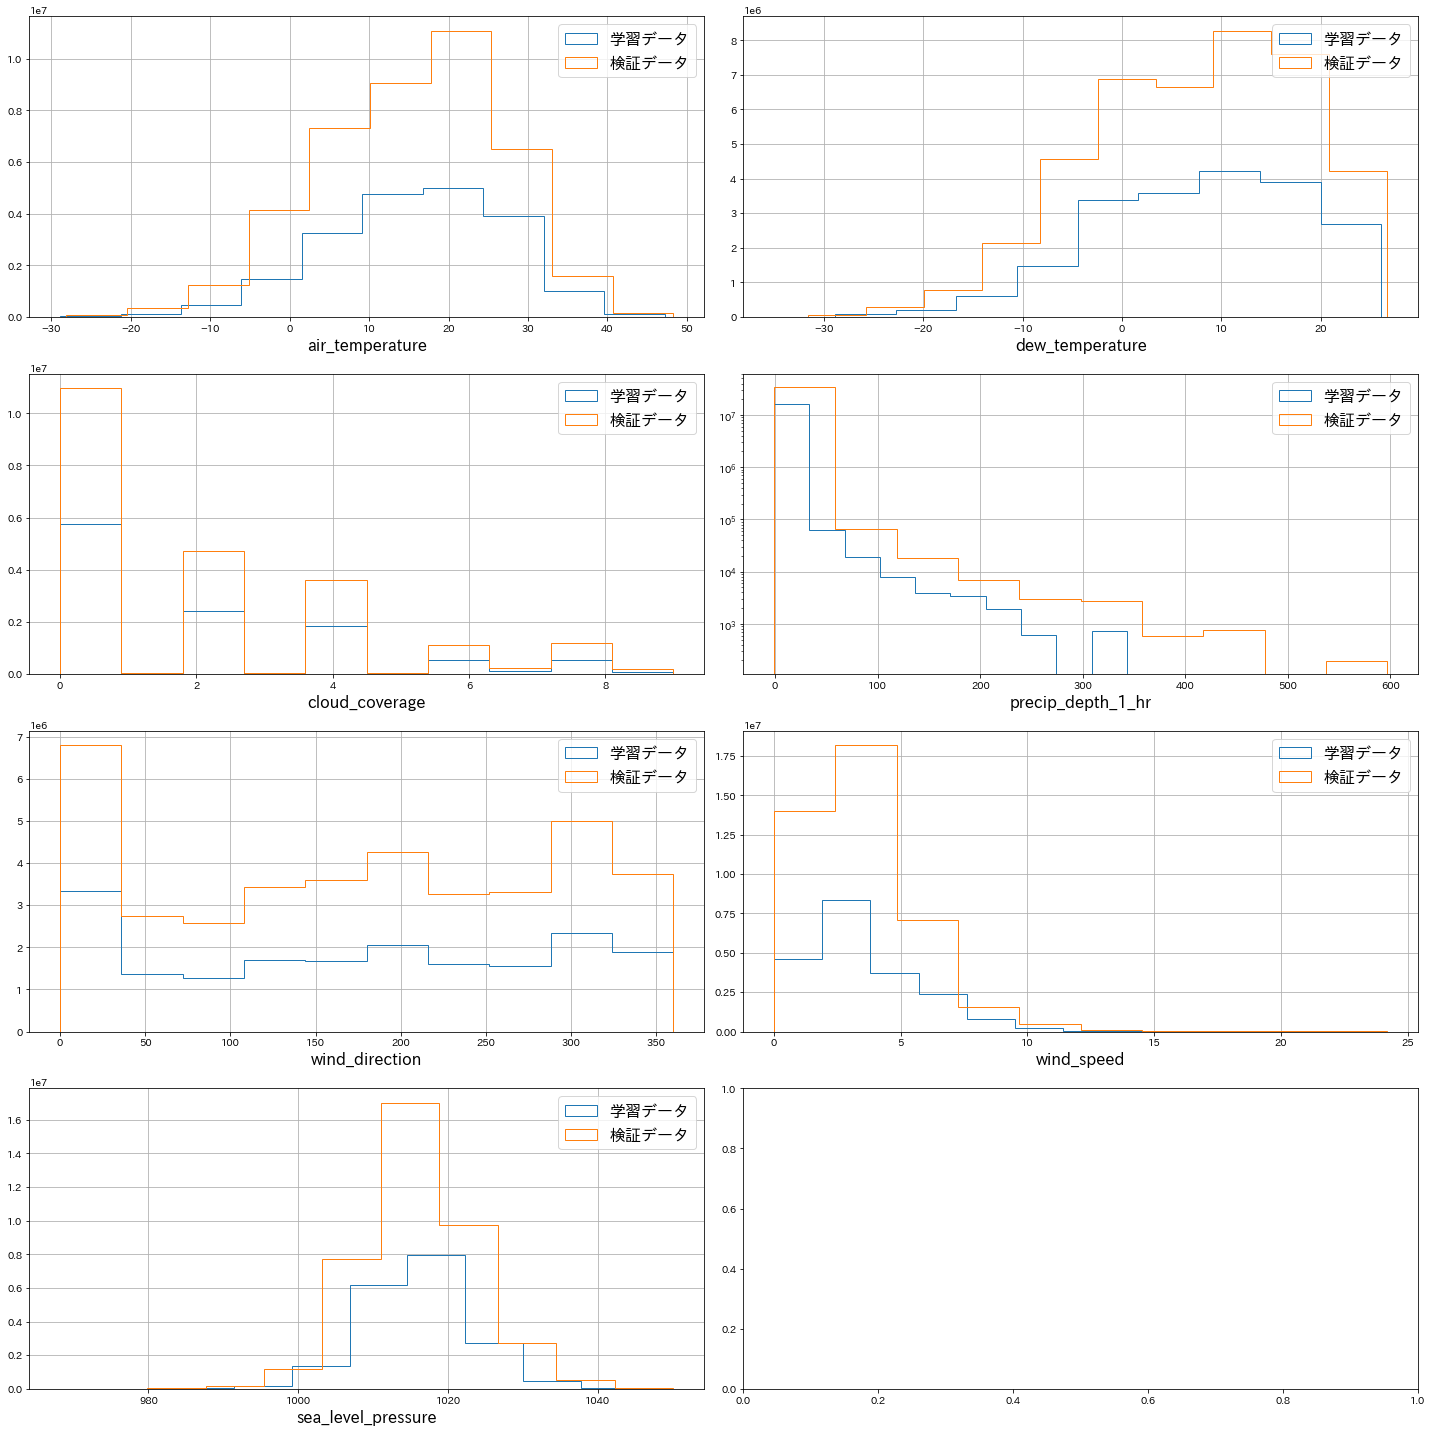

In [18]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
#ax[0][0].hist(data["air_temperature"],histtype="step",label="学習データ")
#ax[0][0].hist(test_data["air_temperature"],histtype="step",label="検証データ")


#ax[0][0].set_xlabel("air_temperature",fontsize=16)
#ax.grid()
making_hist(0,0,"air_temperature",0)
making_hist(0,1,"dew_temperature",0)
making_hist(1,0,"cloud_coverage",0)
making_hist(1,1,"precip_depth_1_hr",1)
making_hist(2,0,"wind_direction",0)
making_hist(2,1,"wind_speed",0)
making_hist(3,0,"sea_level_pressure",0)
plt.tight_layout()

### 建物系の情報

c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\

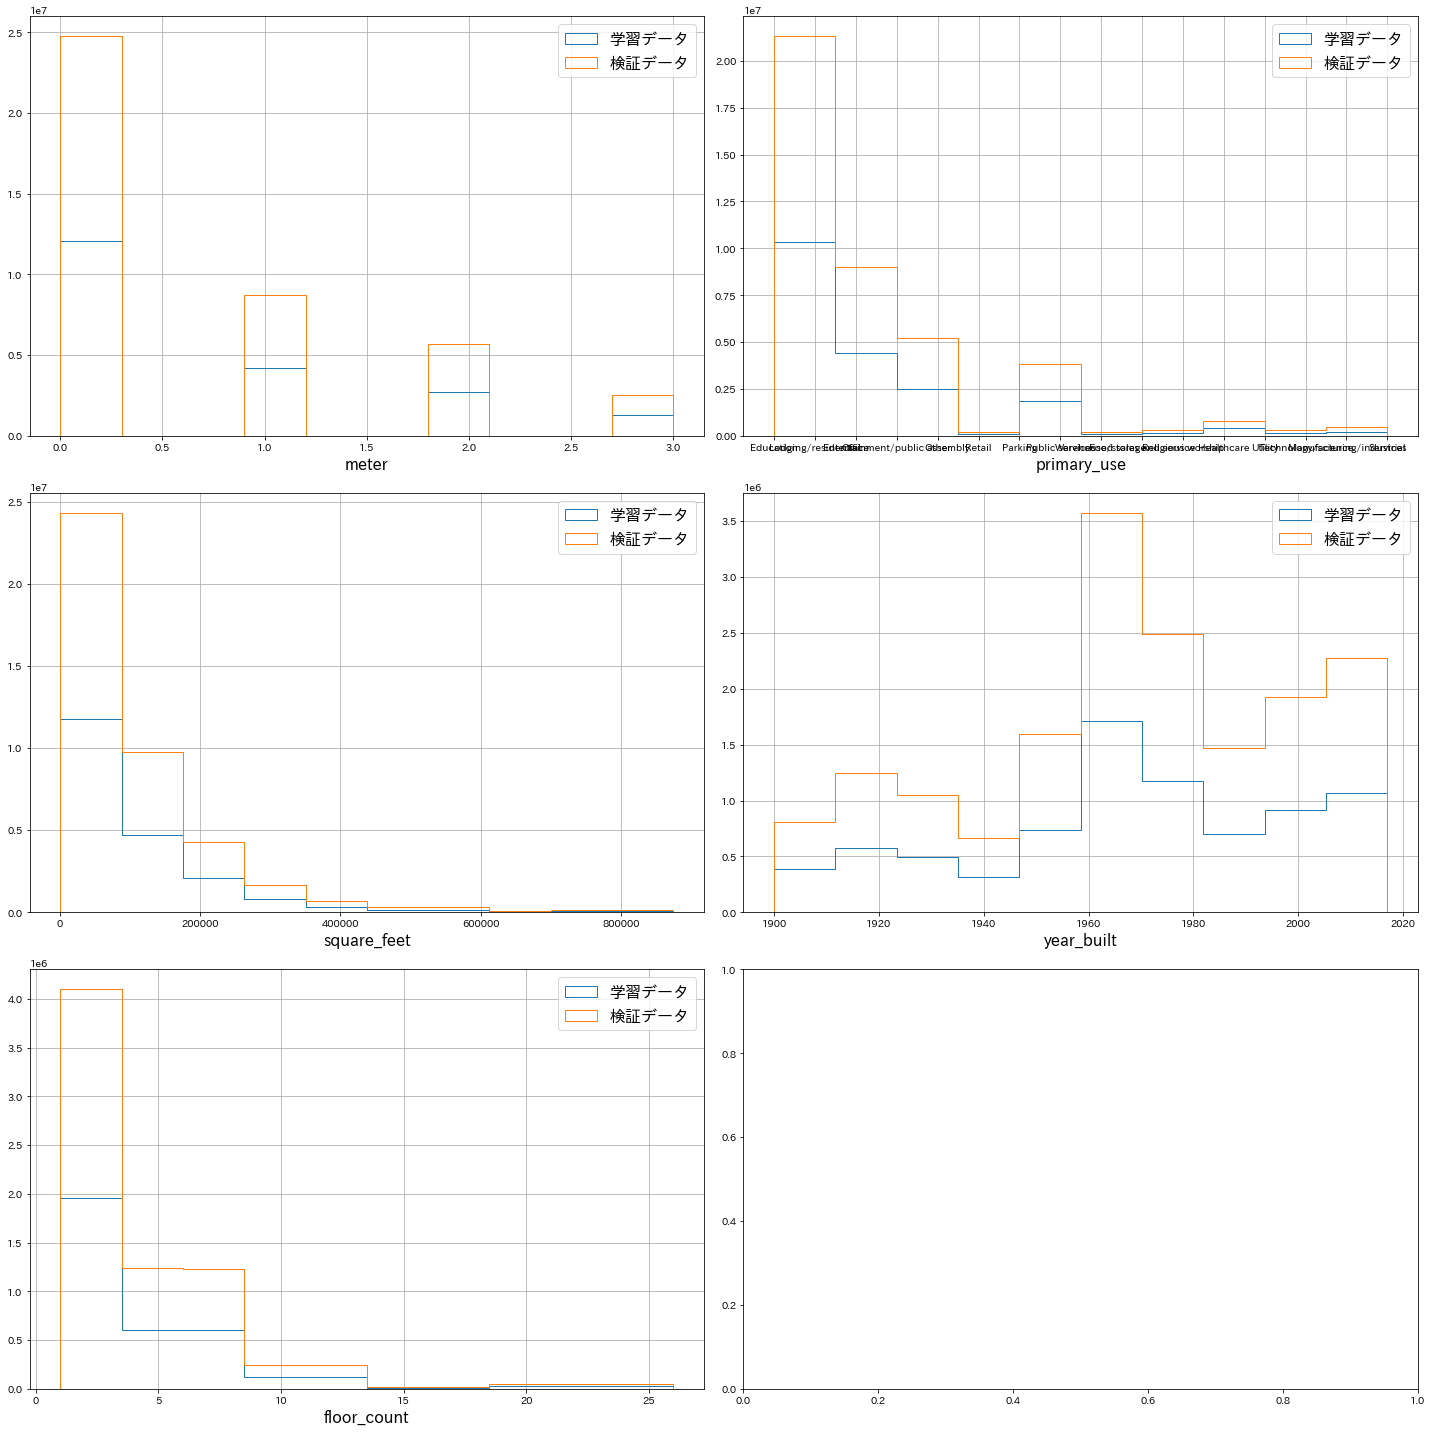

In [19]:
fig,ax=plt.subplots(3,2,figsize=(20,20))
#ax[0][0].hist(data["air_temperature"],histtype="step",label="学習データ")
#ax[0][0].hist(test_data["air_temperature"],histtype="step",label="検証データ")


#ax[0][0].set_xlabel("air_temperature",fontsize=16)
#ax.grid()
making_hist(0,0,"meter",0)
making_hist(0,1,"primary_use",0)
making_hist(1,0,"square_feet",0)
making_hist(1,1,"year_built",0)
making_hist(2,0,"floor_count",0)
plt.tight_layout()

### primary_useがわかりにくかったので再度表示

([<matplotlib.axis.YTick at 0x1af83885508>,
 [Text(0, 0, 'Education'),
  Text(0, 1, 'Office'),
  Text(0, 2, 'Entertainment/public assembly'),
  Text(0, 3, 'Lodging/residential'),
  Text(0, 4, 'Public services'),
  Text(0, 5, 'Healthcare'),
  Text(0, 6, 'Other'),
  Text(0, 7, 'Parking'),
  Text(0, 8, 'Manufacturing/industrial'),
  Text(0, 9, 'Food sales and service'),
  Text(0, 10, 'Retail'),
  Text(0, 11, 'Warehouse/storage'),
  Text(0, 12, 'Services'),
  Text(0, 13, 'Technology/science'),
  Text(0, 14, 'Utility'),
  Text(0, 15, 'Religious worship')])

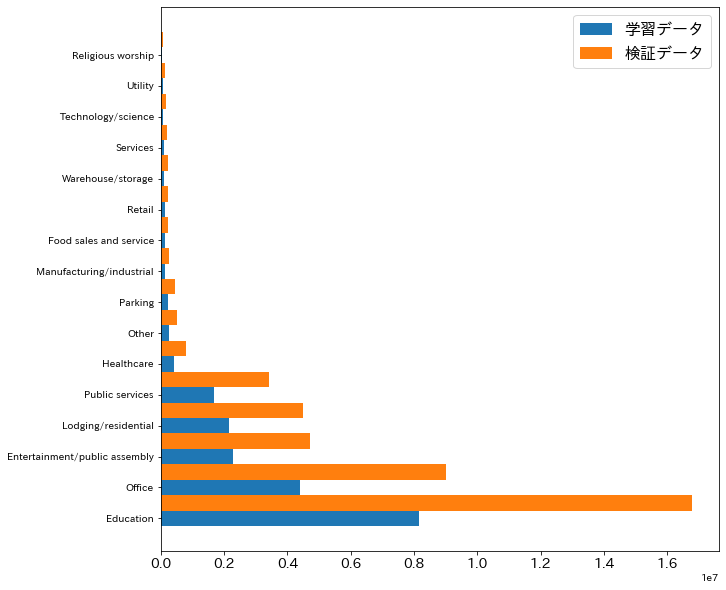

In [20]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.tick_params(axis="x",labelsize=14)
left=np.arange(len(data_merge["primary_use"].value_counts().keys()))
ax.barh(left,data_merge["primary_use"].value_counts(),height=0.5,label="学習データ")
ax.barh(left+0.5,test_data_merge["primary_use"].value_counts(),height=0.5,label="検証データ")
ax.legend(fontsize=16)
plt.yticks(np.arange(len(data_merge["primary_use"].value_counts().keys())),data_merge["primary_use"].value_counts().keys())

In [21]:
data_merge["primary_use"].value_counts()

Education                        8165504
Office                           4394864
Entertainment/public assembly    2264917
Lodging/residential              2146413
Public services                  1662826
Healthcare                        398527
Other                             242222
Parking                           213796
Manufacturing/industrial          125713
Food sales and service            114090
Retail                            112657
Warehouse/storage                 111861
Services                           96519
Technology/science                 77627
Utility                            56203
Religious worship                  32361
Name: primary_use, dtype: int64

In [23]:
data_merge.groupby("primary_use").count()

,building_id,meter,timestamp,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
primary_use,,,,,,,,,,,,,,,
Education,8165504,8165504,8165504,8165504,8165504,8165504,4051418,1911191,8122109,4482979,8119813,6183102,7554590,7467235,8098867
Entertainment/public assembly,2264917,2264917,2264917,2264917,2264917,2264917,841529,468655,2254094,1315036,2253799,1879276,2054174,2076892,2248102
Food sales and service,114090,114090,114090,114090,114090,114090,26343,0,114028,73831,114028,113501,112922,108913,113876
Healthcare,398527,398527,398527,398527,398527,398527,77500,8784,397928,235291,397913,382248,383709,385758,397313
Lodging/residential,2146413,2146413,2146413,2146413,2146413,2146413,1068349,152602,2130263,1236024,2129982,1730758,2071584,1947797,2123476
Manufacturing/industrial,125713,125713,125713,125713,125713,125713,55441,26352,124444,58113,124432,75300,95337,121033,124345
Office,4394864,4394864,4394864,4394864,4394864,4394864,1076179,356542,4378270,2488867,4378004,3772515,4208236,4156441,4370646
Other,242222,242222,242222,242222,242222,242222,56438,124358,241984,139872,241961,233064,230443,234291,241629
Parking,213796,213796,213796,213796,213796,213796,117206,20589,213736,119681,213729,210343,211431,207442,213748


### 次は各変数のmeter_readingの2次元の散布図を表示

In [40]:
### ヒストグラムを作る関数
def scatter_plot(x,y,label,n):
    ax[x][y].scatter(data_merge[label],data_merge["meter_reading"],label="学習データ")
    ax[x][y].set_xlabel(label,fontsize=16)
    ax[x][y].set_ylabel("meter_reading",fontsize=16)
    ax[x][y].legend(fontsize=16)
    ax[x][y].grid()
    if(n==1):
        ax[x][y].set_xscale("log")
    

In [41]:
fig,ax=plt.subplots(4,2,figsize=(20,20))



#ax[0][0].set_xlabel("air_temperature",fontsize=16)
#ax.grid()
scatter_plot(0,0,"air_temperature",0)
scatter_plot(0,1,"dew_temperature",0)
scatter_plot(1,0,"cloud_coverage",0)
scatter_plot(1,1,"precip_depth_1_hr",0)
scatter_plot(2,0,"wind_direction",0)
scatter_plot(2,1,"wind_speed",0)
scatter_plot(3,0,"sea_level_pressure",0)
plt.tight_layout()

MemoryError: Unable to allocate 308. MiB for an array with shape (20216100, 2) and data type float64

MemoryError: Unable to allocate 308. MiB for an array with shape (20216100, 2) and data type float64

<Figure size 1440x1440 with 8 Axes>

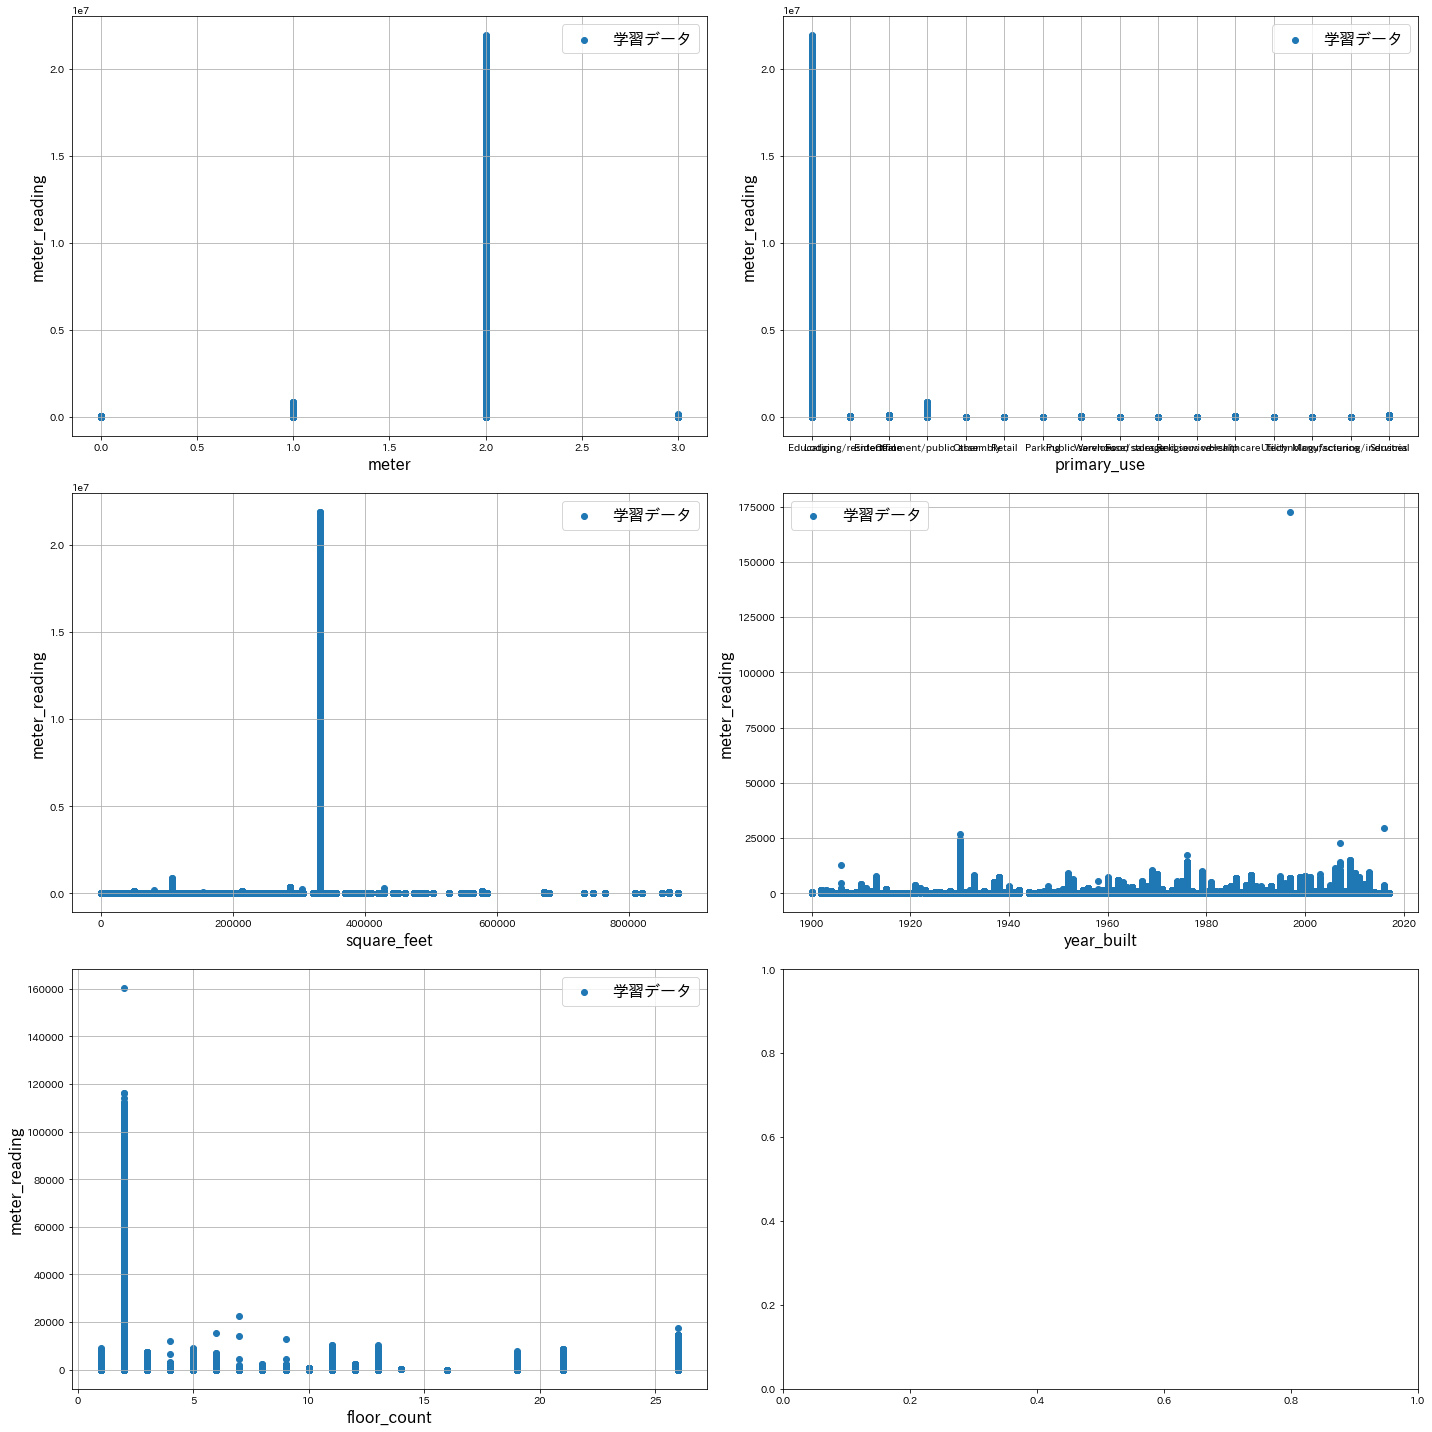

In [116]:
fig,ax=plt.subplots(3,2,figsize=(20,20))
#ax[0][0].hist(data["air_temperature"],histtype="step",label="学習データ")
#ax[0][0].hist(test_data["air_temperature"],histtype="step",label="検証データ")


#ax[0][0].set_xlabel("air_temperature",fontsize=16)
#ax.grid()
scatter_plot(0,0,"meter",0)
scatter_plot(0,1,"primary_use",0)
scatter_plot(1,0,"square_feet",0)
scatter_plot(1,1,"year_built",0)
scatter_plot(2,0,"floor_count",0)
plt.tight_layout()

In [25]:
### ヒストグラムを作る関数
def scatter_plot(x,y,label,n):
    ax[x][y].scatter(data_merge[data_merge["meter"]==0][label],data_merge[data_merge["meter"]==0]["meter_reading"],label="学習データ")
    ax[x][y].set_xlabel(label,fontsize=16)
    ax[x][y].set_ylabel("meter_reading",fontsize=16)
    ax[x][y].legend(fontsize=16)
    ax[x][y].grid()
    if(n==1):
        ax[x][y].set_xscale("log")

MemoryError: Unable to allocate 920. MiB for an array with shape (10, 12060910) and data type float64

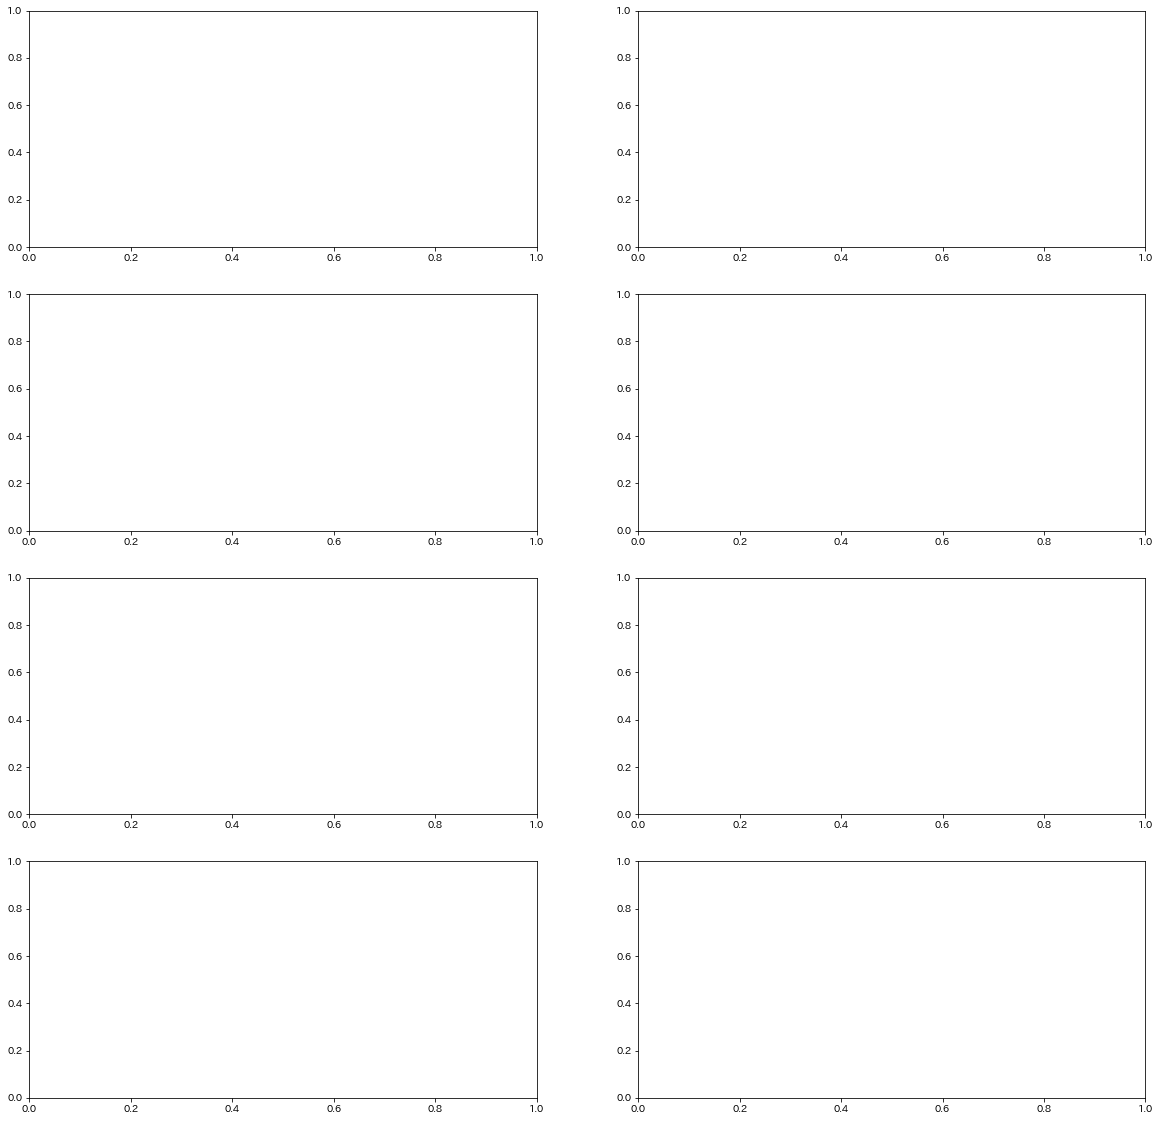

In [29]:
fig,ax=plt.subplots(4,2,figsize=(20,20))



#ax[0][0].set_xlabel("air_temperature",fontsize=16)
#ax.grid()
scatter_plot(0,0,"air_temperature",0)
scatter_plot(0,1,"dew_temperature",0)
scatter_plot(1,0,"cloud_coverage",0)
scatter_plot(1,1,"precip_depth_1_hr",0)
scatter_plot(2,0,"wind_direction",0)
scatter_plot(2,1,"wind_speed",0)
scatter_plot(3,0,"sea_level_pressure",0)
plt.tight_layout()

### データの保存

In [18]:
#test_data.to_csv("検証データ.csv",index=False)

In [19]:
#data.to_csv("学習データ",index=False)